In [1]:
# Enable outputting results interactively. 
# All the results from code in a given cell will be displayed instead of only the last one.

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [2]:
# Standard plotly imports
# import plotly

# plotly.tools.set_credentials_file(username='withwithout', api_key='ZIexWuLtLEEnNjIEFbX3')

import plotly.plotly as py
import plotly.graph_objs as go
from plotly.offline import iplot, init_notebook_mode

# from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot


import plotly.figure_factory as ff

# Using plotly + cufflinks in offline mode
import cufflinks
cufflinks.go_offline(connected=True)
init_notebook_mode(connected=True)

In [3]:
import folium

from folium.plugins import HeatMap
from folium.plugins import HeatMapWithTime

import geopandas as gpd
import json

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
import pandas as pd
import pickle
import numpy as np
import sqlite3
import math
import datetime

In [6]:
listings =  pickle.load( open( "all_SF_listings.p", "rb" ) )

In [7]:
reviews =  pickle.load( open( "all_SF_reviews.p", "rb" ) )
reviews.head()

listing_id     id        date  reviewer_id reviewer_name  \
0         958   5977  2009-07-23        15695      Edmund C   
1         958   6660  2009-08-03        26145         Simon   
2         958  11519  2009-09-27        25839         Denis   
3         958  16282  2009-11-05        33750          Anna   
4         958  26008  2010-02-13        15416       Venetia   

                                            comments  
0  Our experience was, without a doubt, a five st...  
1  Returning to San Francisco is a rejuvenating t...  
2  We were very pleased with the accommodations a...  
3  We highly recommend this accomodation and agre...  
4  Holly's place was great. It was exactly what I...

In [8]:
listings_t = listings.set_index(pd.DatetimeIndex(listings['file_scraped_dt']))
listings_t.head(1)

id                       listing_url       scrape_id  \
file_scraped_dt                                                          
2019-05-03       958  https://www.airbnb.com/rooms/958  20190503153007   

                last_scraped                                 name  \
file_scraped_dt                                                     
2019-05-03        2019-05-03  Bright, Modern Garden Unit - 1BR/1B   

                                                           summary  \
file_scraped_dt                                                      
2019-05-03       New update: the house next door is under const...   

                                                             space  \
file_scraped_dt                                                      
2019-05-03       Newly remodeled, modern, and bright garden uni...   

                                                       description  \
file_scraped_dt                                                      
2019-05-03       New update: the house next door is under const...   

                experiences_offered  \
file_scraped_dt                       
2019-05-03                     none   

                                             neighborhood_overview  \
file_scraped_dt                                                      
2019-05-03       *Quiet cul de sac in friendly neighborhood *St...   

                      ...        is_business_travel_ready cancellation_policy  \
file_scraped_dt       ...                                                       
2019-05-03            ...                               f            moderate   

                require_guest_profile_picture  \
file_scraped_dt                                 
2019-05-03                                  f   

                require_guest_phone_verification  \
file_scraped_dt                                    
2019-05-03                                     f   

                calculated_host_listings_count  \
file_scraped_dt                                  
2019-05-03                                   1   

                calculated_host_listings_count_entire_homes  \
file_scraped_dt                                               
2019-05-03                                              1.0   

                calculated_host_listings_count_private_rooms  \
file_scraped_dt                                                
2019-05-03                                               0.0   

                calculated_host_listings_count_shared_rooms reviews_per_month  \
file_scraped_dt                                                                 
2019-05-03                                              0.0              1.55   

                 file_scraped_dt  
file_scraped_dt                   
2019-05-03            2019-05-03  

[1 rows x 107 columns]

In [9]:
m_ls = listings_t.resample('D').size().reset_index(name='Counts') 
# m_ls = m_ls[m_ls['Counts']>0]
m_ls

file_scraped_dt  Counts
0         2015-05-04    5425
1         2015-05-05       0
2         2015-05-06       0
3         2015-05-07       0
4         2015-05-08       0
5         2015-05-09       0
6         2015-05-10       0
7         2015-05-11       0
8         2015-05-12       0
9         2015-05-13       0
10        2015-05-14       0
11        2015-05-15       0
12        2015-05-16       0
13        2015-05-17       0
14        2015-05-18       0
15        2015-05-19       0
16        2015-05-20       0
17        2015-05-21       0
18        2015-05-22       0
19        2015-05-23       0
20        2015-05-24       0
21        2015-05-25       0
22        2015-05-26       0
23        2015-05-27       0
24        2015-05-28       0
25        2015-05-29       0
26        2015-05-30       0
27        2015-05-31       0
28        2015-06-01       0
29        2015-06-02       0
...              ...     ...
1431      2019-04-04       0
1432      2019-04-05       0
1433      2019-04-06       0
1434      2019-04-07       0
1435      2019-04-08       0
1436      2019-04-09       0
1437      2019-04-10       0
1438      2019-04-11       0
1439      2019-04-12       0
1440      2019-04-13       0
1441      2019-04-14       0
1442      2019-04-15       0
1443      2019-04-16       0
1444      2019-04-17       0
1445      2019-04-18       0
1446      2019-04-19       0
1447      2019-04-20       0
1448      2019-04-21       0
1449      2019-04-22       0
1450      2019-04-23       0
1451      2019-04-24       0
1452      2019-04-25       0
1453      2019-04-26       0
1454      2019-04-27       0
1455      2019-04-28       0
1456      2019-04-29       0
1457      2019-04-30       0
1458      2019-05-01       0
1459      2019-05-02       0
1460      2019-05-03    7353

[1461 rows x 2 columns]

(0, 9500)

Text(0.5, 0, 'Month')

Text(0, 0.5, 'Number of Active Listings')

Text(0.5, 1.0, 'Number of Active Listings on Airbnb: May 2015 - May 2019')

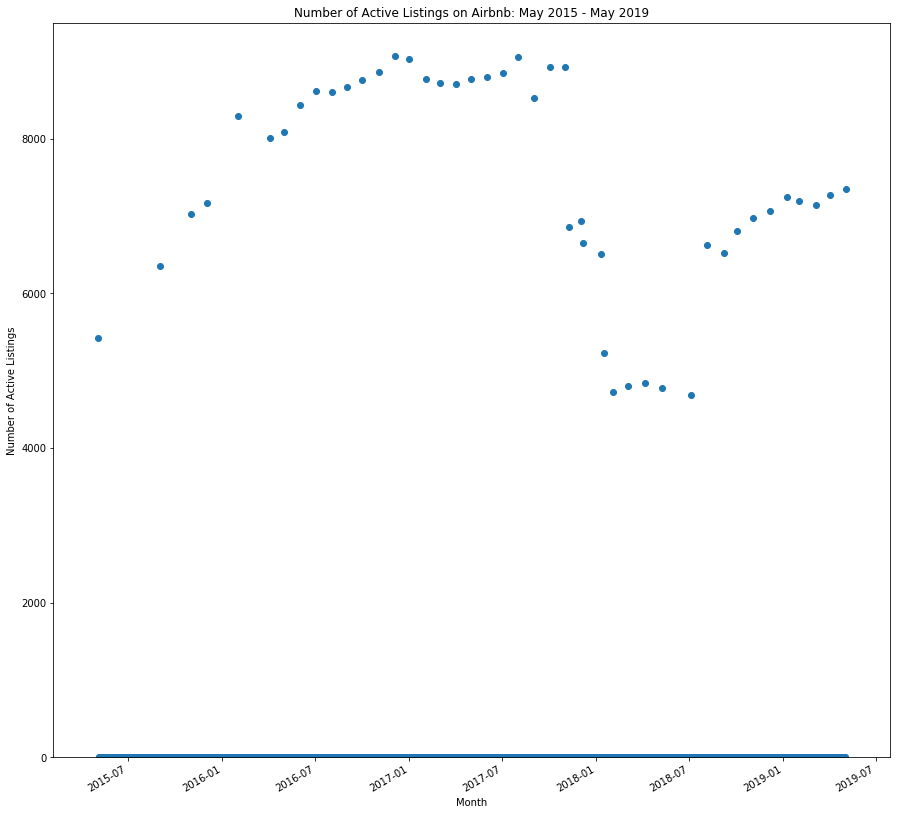

In [10]:
import matplotlib.dates as mdates

times = pd.date_range('2015-05-04', periods=1461, freq='D')

fig, ax = plt.subplots(1,figsize = (15,15))
fig.autofmt_xdate()
plt.scatter(times, m_ls['Counts'])
ax.set_ylim(0,9500)
plt.xlabel("Month")
plt.ylabel("Number of Active Listings")
plt.title("Number of Active Listings on Airbnb: May 2015 - May 2019")

xfmt = mdates.DateFormatter('%m-%d-%y')
# ax.xaxis.set_major_formatter(xfmt)

plt.show()

In [11]:
# pd.crosstab(listings['id'],listings['file_scraped_dt'],margins=True)

In [12]:
f = lambda x: 'BED & BREAKFAST' if x == 'BED AND BREAKFAST' else x

listings['property_type_c'] = listings['property_type'].str.upper().map(f)

In [13]:
sub = listings[['file_scraped_dt','id','host_since','host_id','property_type_c', 'room_type', 'minimum_nights', 'neighbourhood', 'review_scores_rating', 'review_scores_accuracy','review_scores_communication','review_scores_cleanliness','review_scores_location','review_scores_checkin','review_scores_value']]
sub.shape

(334790, 15)

In [14]:
conn = sqlite3.connect("airbnb.db")
sub.to_sql('listings_db', conn, if_exists='replace')

In [15]:
reviews.to_sql('reviews', conn, if_exists='replace')

In [16]:
ls_reviews = pd.read_sql_query(
    'select listing_id, min(date) as first_review_dt,max(date) as last_review_dt, count(*) as count_reviews from reviews group by listing_id order by count_reviews desc;' ,conn)

ls_reviews['reviews_history_month'] = (pd.to_datetime(ls_reviews['last_review_dt']) - pd.to_datetime(ls_reviews['first_review_dt']))/np.timedelta64(1, 'M')

ls_reviews.head()


listing_id first_review_dt last_review_dt  count_reviews  \
0      545685      2012-06-28     2019-04-28            731   
1        8739      2009-08-01     2019-04-30            708   
2      205842      2012-07-22     2019-01-01            674   
3     1920033      2013-11-22     2019-05-01            660   
4      585326      2012-07-14     2019-04-27            652   

   reviews_history_month  
0              81.972936  
1             116.930532  
2              77.340397  
3              65.249800  
4              81.414403

In [17]:
ls_reviews['reviews_history_month'].iplot(
    kind='hist',
    histnorm='percent',
  
    xTitle='Months',
    yTitle='(%) of Listings',
    title='Booking History of a Listing <br> Months Difference between the First Review Date and the Last Review Date')

In [18]:
ls_reviews['count_reviews'].iplot(
    kind='hist',
    histnorm='percent',
  
    xTitle='Number of Reviews',
    yTitle='(%) of Listings',
    title='Number of Reviews for a Listing')

In [19]:
plus5_reviews = ls_reviews[ls_reviews['count_reviews']>= 5]

plus5_reviews['count_reviews'].iplot(
    kind='hist',
    histnorm='percent',
  
    xTitle='Number of Reviews',
    yTitle='(%) of Listings',
    title='Number of Reviews for a Listing <br> Listing with a minimum of 5 reviews')

In [20]:
ls_reviews.to_sql('ls_reviews', conn, if_exists='replace')

In [21]:
tab1 = pd.read_sql_query(
    'select id as listing_id, property_type_c, room_type, host_since, min(file_scraped_dt) as first_scraped_dt, max(file_scraped_dt) as last_scraped_dt from listings_db group by id;' ,conn)
tab1.head()

tab1.shape


listing_id property_type_c        room_type  host_since first_scraped_dt  \
0         958       APARTMENT  Entire home/apt  2008-07-31       2015-05-04   
1        2822           HOUSE     Private room  2008-09-24       2015-09-02   
2        3850           HOUSE     Private room  2008-12-08       2015-05-04   
3        5021       APARTMENT  Entire home/apt  2009-01-29       2016-12-03   
4        5193       APARTMENT  Entire home/apt  2009-02-05       2015-05-04   

  last_scraped_dt  
0      2019-05-03  
1      2016-06-02  
2      2015-05-04  
3      2018-01-17  
4      2017-03-02

(29533, 6)

In [22]:
tab1.to_sql('ls_dt_range', conn, if_exists='replace')


In [23]:
ls_tab = pd.read_sql_query(
    'select a.*, b.first_review_dt, b.last_review_dt, b.count_reviews, b.reviews_history_month from ls_dt_range as a left join ls_reviews as b on a.listing_id = b.listing_id',conn)

ls_tab.head()

index  listing_id property_type_c        room_type  host_since  \
0      0         958       APARTMENT  Entire home/apt  2008-07-31   
1      1        2822           HOUSE     Private room  2008-09-24   
2      2        3850           HOUSE     Private room  2008-12-08   
3      3        5021       APARTMENT  Entire home/apt  2009-01-29   
4      4        5193       APARTMENT  Entire home/apt  2009-02-05   

  first_scraped_dt last_scraped_dt first_review_dt last_review_dt  \
0       2015-05-04      2019-05-03      2009-07-23     2019-04-17   
1       2015-09-02      2016-06-02      2010-07-25     2016-05-08   
2       2015-05-04      2015-05-04      2009-07-16     2015-01-01   
3       2016-12-03      2018-01-17      2011-07-04     2017-12-31   
4       2015-05-04      2017-03-02      2009-09-29     2016-12-20   

   count_reviews  reviews_history_month  
0          192.0             116.799113  
1           55.0              69.455225  
2          120.0              65.545494  
3            6.0              77.931785  
4          309.0              86.704039

In [24]:

ls_tab['listing_month_diff'] = (pd.to_datetime(ls_tab['last_scraped_dt']) - pd.to_datetime(ls_tab['first_review_dt']))/np.timedelta64(1, 'M')
ls_tab['listing_day_diff'] = (pd.to_datetime(ls_tab['last_scraped_dt']) - pd.to_datetime(ls_tab['first_review_dt'])).dt.days


ls_tab['review_month_diff'] = (pd.to_datetime(ls_tab['last_review_dt']) - pd.to_datetime(ls_tab['first_review_dt']))/np.timedelta64(1, 'M')
ls_tab['review_day_diff'] = (pd.to_datetime(ls_tab['last_review_dt']) - pd.to_datetime(ls_tab['first_review_dt'])).dt.days


ls_tab.head()



index  listing_id property_type_c        room_type  host_since  \
0      0         958       APARTMENT  Entire home/apt  2008-07-31   
1      1        2822           HOUSE     Private room  2008-09-24   
2      2        3850           HOUSE     Private room  2008-12-08   
3      3        5021       APARTMENT  Entire home/apt  2009-01-29   
4      4        5193       APARTMENT  Entire home/apt  2009-02-05   

  first_scraped_dt last_scraped_dt first_review_dt last_review_dt  \
0       2015-05-04      2019-05-03      2009-07-23     2019-04-17   
1       2015-09-02      2016-06-02      2010-07-25     2016-05-08   
2       2015-05-04      2015-05-04      2009-07-16     2015-01-01   
3       2016-12-03      2018-01-17      2011-07-04     2017-12-31   
4       2015-05-04      2017-03-02      2009-09-29     2016-12-20   

   count_reviews  reviews_history_month  listing_month_diff  listing_day_diff  \
0          192.0             116.799113          117.324791            3571.0   
1           55.0              69.455225           70.276597            2139.0   
2          120.0              65.545494           69.586644            2118.0   
3            6.0              77.931785           78.490318            2389.0   
4          309.0              86.704039           89.069591            2711.0   

   review_month_diff  review_day_diff  
0         116.799113           3555.0  
1          69.455225           2114.0  
2          65.545494           1995.0  
3          77.931785           2372.0  
4          86.704039           2639.0

In [25]:
# ls_tab.sort_values(by='listing_month_diff')

In [26]:
no_reviews = ls_tab[ls_tab['first_review_dt'].isnull()]
no_reviews.head()

no_reviews.shape

#8514 listings have no reviews. 

index  listing_id property_type_c        room_type  host_since  \
7       7        6810           HOUSE  Entire home/apt  2009-05-03   
8       8        6906       APARTMENT      Shared room  2009-05-08   
57     57       22278       APARTMENT  Entire home/apt  2010-02-25   
58     58       22955       APARTMENT  Entire home/apt  2010-03-04   
87     87       27707           HOUSE  Entire home/apt  2010-05-07   

   first_scraped_dt last_scraped_dt first_review_dt last_review_dt  \
7        2017-01-01      2017-03-02            None           None   
8        2016-10-01      2016-10-01            None           None   
57       2017-03-02      2017-03-02            None           None   
58       2016-12-03      2016-12-03            None           None   
87       2015-05-04      2018-01-17            None           None   

    count_reviews  reviews_history_month  listing_month_diff  \
7             NaN                    NaN                 NaN   
8             NaN                    NaN                 NaN   
57            NaN                    NaN                 NaN   
58            NaN                    NaN                 NaN   
87            NaN                    NaN                 NaN   

    listing_day_diff  review_month_diff  review_day_diff  
7                NaN                NaN              NaN  
8                NaN                NaN              NaN  
57               NaN                NaN              NaN  
58               NaN                NaN              NaN  
87               NaN                NaN              NaN

(8514, 15)

In [27]:
ls_w_reviews = ls_tab[pd.notna(ls_tab['first_review_dt'])]
ls_w_reviews.shape

(21019, 15)

In [28]:
ls_tab[ls_tab['listing_month_diff']<=0]

index  listing_id property_type_c        room_type  host_since  \
17518  17518    13802856       APARTMENT     Private room  2016-04-21   
19165  19165    15289877           HOUSE  Entire home/apt  2016-09-23   
27775  27775    29566422       APARTMENT  Entire home/apt  2018-10-25   

      first_scraped_dt last_scraped_dt first_review_dt last_review_dt  \
17518       2016-07-02      2016-07-02      2016-07-02     2016-07-02   
19165       2016-10-01      2016-10-01      2016-10-01     2016-10-01   
27775       2018-11-03      2018-11-03      2018-11-03     2018-11-03   

       count_reviews  reviews_history_month  listing_month_diff  \
17518            2.0                    0.0                 0.0   
19165            1.0                    0.0                 0.0   
27775            1.0                    0.0                 0.0   

       listing_day_diff  review_month_diff  review_day_diff  
17518               0.0                0.0              0.0  
19165               0.0                0.0              0.0  
27775               0.0                0.0              0.0

In [29]:
# the chart excludes listings with no reviews.

ls_w_reviews[['listing_month_diff']].iplot(
    kind='hist',
    histnorm='percent',
  
    xTitle='Months',
    yTitle='(%) of Listings',
    title='Longevity of a Listing <br> Months Difference between the First Review Date and the Last Scraped Date')

In [30]:
# the chart includs listings with no reviews.

ls_tab[['listing_month_diff']].iplot(
    kind='hist',
    histnorm='percent',
  
    xTitle='Months',
    yTitle='(%) of Listings',
    title='Longevity of a Listing <br> Months Difference between the First Review Date and the Last Scraped Date')

In [31]:
scores = pd.read_sql_query(
    'select id as listing_id, avg(review_scores_rating) as overall_scores, avg(review_scores_accuracy) as accuracy_scores,avg(review_scores_communication) as communication_scores,avg(review_scores_cleanliness) as cleaniness_scores,avg(review_scores_location) as location_scores,avg(review_scores_checkin) as checkin_scores,avg(review_scores_value) as value_scores from listings_db group by listing_id order by overall_scores',conn)

scores.head()




listing_id  overall_scores  accuracy_scores  communication_scores  \
0        6810             NaN              NaN                   NaN   
1        6906             NaN              NaN                   NaN   
2       22278             NaN              NaN                   NaN   
3       22955             NaN              NaN                   NaN   
4       27707             NaN              NaN                   NaN   

   cleaniness_scores  location_scores  checkin_scores  value_scores  
0                NaN              NaN             NaN           NaN  
1                NaN              NaN             NaN           NaN  
2                NaN              NaN             NaN           NaN  
3                NaN              NaN             NaN           NaN  
4                NaN              NaN             NaN           NaN

In [32]:
scores.to_sql('scores_db', conn, if_exists='replace')

In [33]:
ls_tab.to_sql('ls_tab_db', conn, if_exists='replace')

ls_tab2 = pd.read_sql_query(
    'select a.*, b.overall_scores, b.accuracy_scores, b.communication_scores, b.cleaniness_scores, b.location_scores, b.checkin_scores,b.value_scores from ls_tab_db as a left join scores_db as b on a.listing_id = b.listing_id',conn)

ls_tab2.head()

level_0  index  listing_id property_type_c        room_type  host_since  \
0        0      0         958       APARTMENT  Entire home/apt  2008-07-31   
1        1      1        2822           HOUSE     Private room  2008-09-24   
2        2      2        3850           HOUSE     Private room  2008-12-08   
3        3      3        5021       APARTMENT  Entire home/apt  2009-01-29   
4        4      4        5193       APARTMENT  Entire home/apt  2009-02-05   

  first_scraped_dt last_scraped_dt first_review_dt last_review_dt  \
0       2015-05-04      2019-05-03      2009-07-23     2019-04-17   
1       2015-09-02      2016-06-02      2010-07-25     2016-05-08   
2       2015-05-04      2015-05-04      2009-07-16     2015-01-01   
3       2016-12-03      2018-01-17      2011-07-04     2017-12-31   
4       2015-05-04      2017-03-02      2009-09-29     2016-12-20   

       ...       listing_day_diff  review_month_diff  review_day_diff  \
0      ...                 3571.0         116.799113           3555.0   
1      ...                 2139.0          69.455225           2114.0   
2      ...                 2118.0          65.545494           1995.0   
3      ...                 2389.0          77.931785           2372.0   
4      ...                 2711.0          86.704039           2639.0   

   overall_scores  accuracy_scores  communication_scores  cleaniness_scores  \
0       97.022222             10.0                  10.0              10.00   
1       98.000000             10.0                  10.0              10.00   
2       93.000000              9.0                  10.0               9.00   
3       90.666667              9.0                  10.0               9.00   
4       92.812500              9.0                  10.0               9.75   

   location_scores  checkin_scores  value_scores  
0          10.0000            10.0      9.866667  
1           9.0000            10.0     10.000000  
2           9.0000            10.0      9.000000  
3          10.0000            10.0      8.000000  
4           9.9375            10.0      9.000000  

[5 rows x 23 columns]

In [34]:
ls_tab2.columns

Index(['level_0', 'index', 'listing_id', 'property_type_c', 'room_type',
       'host_since', 'first_scraped_dt', 'last_scraped_dt', 'first_review_dt',
       'last_review_dt', 'count_reviews', 'reviews_history_month',
       'listing_month_diff', 'listing_day_diff', 'review_month_diff',
       'review_day_diff', 'overall_scores', 'accuracy_scores',
       'communication_scores', 'cleaniness_scores', 'location_scores',
       'checkin_scores', 'value_scores'],
      dtype='object')

In [35]:
ls_tab2.drop(['level_0'], axis = 1).to_sql('listings_scores_db', conn, if_exists='replace')

In [36]:
# Relationship between longevity of a listing and scores

trace = go.Scatter(
    x = ls_tab2['overall_scores'],
    y = ls_tab2['listing_month_diff'],
    mode = 'markers'
)

data = [trace]

layout = go.Layout(
    title=go.layout.Title(
        text='Overall Review Scores vs Longevity of a Listing',
        xref='paper',
#         x=0
    ),
    xaxis=go.layout.XAxis(
        title=go.layout.xaxis.Title(
            text='Average Review Scores',
            font=dict(
#                 family='Courier New, monospace',
                size=12,
                color='#7f7f7f'
            )
        )
    ),
    yaxis=go.layout.YAxis(
        title=go.layout.yaxis.Title(
            text='Longevty of a Listing',
            font=dict(
#                 family='Courier New, monospace',
                size=12,
                color='#7f7f7f'
            )
        )
    )
)
fig = go.Figure(data=data, layout=layout)
py.iplot(fig, figname = "scatter-plot")

C:\Users\ksher\AppData\Local\Continuum\anaconda3\lib\site-packages\IPython\core\display.py:689: UserWarning:

Consider using IPython.display.IFrame instead



In [37]:
# Relationship between number of reviews and length of booking history


trace = go.Scatter(
    x = ls_reviews['reviews_history_month'],
    y = ls_reviews['count_reviews'],
    mode = 'markers'
)

data = [trace]

layout = go.Layout(
    title=go.layout.Title(
        text='Length of Booking History vs Number of Reviews',
        xref='paper',
#         x=0
    ),
    xaxis=go.layout.XAxis(
        title=go.layout.xaxis.Title(
            text='Approximation of Booking History in Months',
            font=dict(
#                 family='Courier New, monospace',
                size=12,
                color='#7f7f7f'
            )
        )
    ),
    yaxis=go.layout.YAxis(
        title=go.layout.yaxis.Title(
            text='Number of Reviews',
            font=dict(
#                 family='Courier New, monospace',
                size=12,
                color='#7f7f7f'
            )
        )
    )
)
fig = go.Figure(data=data, layout=layout)
py.iplot(fig, figname = "scatter-plot")

# Plot and embed in ipython notebook!
# py.iplot(data, xTitle = "Length of Booking History in Months", yTitle = "Number of Reviews")

In [38]:

trace = go.Scatter(
    x = ls_tab['listing_month_diff'],
    y = ls_tab['count_reviews'],
    mode = 'markers'
)

data = [trace]

layout = go.Layout(
    title=go.layout.Title(
        text='Longevity of a Listing vs Number of Reviews',
        xref='paper',
#         x=0
    ),
    xaxis=go.layout.XAxis(
        title=go.layout.xaxis.Title(
            text='Longevity of a Listing in Months',
            font=dict(
#                 family='Courier New, monospace',
                size=12,
                color='#7f7f7f'
            )
        )
    ),
    yaxis=go.layout.YAxis(
        title=go.layout.yaxis.Title(
            text='Number of Reviews',
            font=dict(
#                 family='Courier New, monospace',
                size=12,
                color='#7f7f7f'
            )
        )
    )
)
fig = go.Figure(data=data, layout=layout)
py.iplot(fig, figname = "scatter-plot")

In [39]:
trace = go.Scatter(
    x = ls_tab['listing_month_diff'],
    y = ls_tab['review_month_diff'],
    mode = 'markers'
)

data = [trace]

layout = go.Layout(
    title=go.layout.Title(
        text='Longevity of a Listing vs Approximation of Booking History',
        xref='paper',
#         x=0
    ),
    xaxis=go.layout.XAxis(
        title=go.layout.xaxis.Title(
            text='Longevity of a Listing in Months',
            font=dict(
#                 family='Courier New, monospace',
                size=12,
                color='#7f7f7f'
            )
        )
    ),
    yaxis=go.layout.YAxis(
        title=go.layout.yaxis.Title(
            text='Approximation of Booking History in Months',
            font=dict(
#                 family='Courier New, monospace',
                size=12,
                color='#7f7f7f'
            )
        )
    )
)
fig = go.Figure(data=data, layout=layout)
py.iplot(fig, figname = "scatter-plot")

In [40]:
ls_tab_trunc = ls_tab[ls_tab['last_scraped_dt'] != '2019-05-03']
ls_tab_trunc.head(1)

index  listing_id property_type_c     room_type  host_since  \
1      1        2822           HOUSE  Private room  2008-09-24   

  first_scraped_dt last_scraped_dt first_review_dt last_review_dt  \
1       2015-09-02      2016-06-02      2010-07-25     2016-05-08   

   count_reviews  reviews_history_month  listing_month_diff  listing_day_diff  \
1           55.0              69.455225           70.276597            2139.0   

   review_month_diff  review_day_diff  
1          69.455225           2114.0

In [41]:
# ls_tab['year'] = pd.to_datetime(ls_tab['last_scraped_dt']).dt.year 
# ls_tab['month'] = pd.to_datetime(ls_tab['last_scraped_dt']).dt.month
# ls_tab.head()

# ls_tab_truncated = ls_tab[not (ls_tab['year'] == 2019 and ls_tab['month'] == 5)]
# # sub2 = listings_t_truncated[['file_scraped_dt','id','host_since','host_id']]

ls_tab_trunc[['last_scraped_dt']].iplot(
    kind='hist',
#     histnorm='percent',
  
    xTitle='Months',
    yTitle='(%) of Listings',
    title='Last Scraped Date')


# Some listngs may have legitimately disappeared as of May 2019. It's unknown unless the next month's scrape is available.

In [42]:
# last listing date for a given host

tab2 = pd.read_sql_query(
    'select host_id, host_since, max(file_scraped_dt) as last_scraped_dt from dt_range group by host_id;' ,conn)

tab2['host_month_diff'] = (pd.to_datetime(tab2['last_scraped_dt']) - pd.to_datetime(tab2['host_since']))/np.timedelta64(1, 'M')
tab2.head()

host_id  host_since last_scraped_dt  host_month_diff
0       46  2008-03-03      2019-05-03       133.982217
1      240  2008-03-28      2016-06-02        98.170394
2      254  2008-04-03      2015-05-04        84.995585
3      316  2008-05-26      2017-05-02       107.205487
4      322  2008-05-28      2016-04-03        94.194953

In [43]:
# hosts could also be guests. when a host disappears from the website, does Airbnb lose a guest as well?

tab2[['host_month_diff']].iplot(
    kind='hist',
    histnorm='percent',
  
    xTitle='Months',
    yTitle='Percentage of Hosts',
    title='Longevity of a Host <br> Months Difference between Sign-up Date and the Last Scraped Date')

In [44]:
host_ls = pd.read_sql_query(
    'select host_id, count(distinct(id)) as count_unique_listings from dt_range group by host_id order by count_unique_listings desc;' ,conn)
host_ls.head(10)

host_id  count_unique_listings
0   48005494                    273
1  219930816                    179
2  107434423                    145
3   12243051                    130
4    4430421                     95
5  103340667                     82
6    1682188                     77
7      38836                     71
8   17042045                     69
9    7750221                     66

In [45]:
prop1 = pd.read_sql_query(
    'select room_type, count(*) as num  from dt_range group by room_type;' ,conn)
prop1.head()

room_type     num
0  Entire home/apt  197409
1     Private room  127094
2      Shared room   10287

In [46]:
prop1 = pd.read_sql_query(
    'select count(*) as num  from dt_range;' ,conn)
prop1.head()                    

num
0  334790

In [47]:
prop = pd.read_sql_query(
    'select id as listing_id, property_type_c, room_type from dt_range group by id;' ,conn)
prop.head()



listing_id property_type_c        room_type
0         958       APARTMENT  Entire home/apt
1        2822           HOUSE     Private room
2        3850           HOUSE     Private room
3        5021       APARTMENT  Entire home/apt
4        5193       APARTMENT  Entire home/apt

In [48]:
prop.to_sql('prop_room', conn, if_exists='replace')

In [49]:
entire_home = pd.read_sql_query(
    'select property_type_c,  count(*) as listing_count from prop_room where room_type = "Entire home/apt" group by property_type_c order by listing_count desc;' ,conn)
entire_home

property_type_c  listing_count
0            APARTMENT          10655
1                HOUSE           2908
2          CONDOMINIUM           1425
3          GUEST SUITE            602
4                 LOFT            314
5   SERVICED APARTMENT            157
6            TOWNHOUSE            155
7                OTHER            106
8           GUESTHOUSE             79
9       BOUTIQUE HOTEL             43
10           CAMPER/RV             38
11           TIMESHARE             35
12              IN-LAW             34
13            BUNGALOW             30
14                BOAT             28
15        ENTIRE FLOOR             10
16             COTTAGE              9
17               CABIN              7
18               VILLA              7
19                None              6
20     BED & BREAKFAST              6
21              CASTLE              5
22              RESORT              5
23                DORM              4
24                TENT              4
25                 BUS              3
26          TINY HOUSE              3
27                YURT              3
28          APARTHOTEL              1
29                BARN              1
30                CAVE              1
31              CHALET              1
32         EARTH HOUSE              1
33              HOSTEL              1
34               HOTEL              1
35                 HUT              1
36           TREEHOUSE              1

In [50]:
labels = list(entire_home['property_type_c'])
values = list(entire_home['listing_count']) 

trace = go.Pie(labels=labels, values=values)

py.iplot([trace],title='Percentage of Listings by Property Type: Private home/apartment only')



In [51]:
private_room = pd.read_sql_query(
    'select property_type_c,  count(*) as listing_count from prop_room where room_type = "Private room" group by property_type_c order by listing_count desc;' ,conn)
private_room

labels = list(private_room['property_type_c'])
values = list(private_room['listing_count']) 

trace = go.Pie(labels=labels, values=values)

py.iplot([trace],title='Percentage of Listings by Property Type: Private room only')


property_type_c  listing_count
0            APARTMENT           5754
1                HOUSE           3674
2          CONDOMINIUM            586
3       BOUTIQUE HOTEL            319
4            TOWNHOUSE            211
5                HOTEL            167
6                 LOFT            103
7          GUEST SUITE             94
8      BED & BREAKFAST             93
9                OTHER             87
10              HOSTEL             58
11                DORM             42
12          APARTHOTEL             37
13  SERVICED APARTMENT             20
14              RESORT             18
15          GUESTHOUSE             15
16               VILLA             14
17           TIMESHARE             10
18               CABIN              7
19           CAMPER/RV              6
20              CASTLE              6
21              IN-LAW              6
22            BUNGALOW              5
23             COTTAGE              5
24        ENTIRE FLOOR              5
25                BOAT              3
26         EARTH HOUSE              3
27           TREEHOUSE              3
28     CASA PARTICULAR              2
29                TENT              2
30          TINY HOUSE              2
31                None              1
32                CAVE              1
33              ISLAND              1
34               PLANE              1
35       VACATION HOME              1

In [53]:
shared_room = pd.read_sql_query(
    'select property_type_c,  count(*) as listing_count from prop_room where room_type = "Shared room" group by property_type_c order by listing_count desc;' ,conn)
shared_room

labels = list(shared_room['property_type_c'])
values = list(shared_room['listing_count']) 

trace = go.Pie(labels=labels, values=values)

py.iplot([trace],title='Percentage of Listings by Property Type: Shared room only')

property_type_c  listing_count
0            APARTMENT            603
1                HOUSE            581
2                 LOFT             83
3               HOSTEL             57
4      BED & BREAKFAST             38
5                 DORM             38
6          CONDOMINIUM             27
7            TOWNHOUSE             17
8                OTHER             10
9   SERVICED APARTMENT              9
10                 BUS              5
11               VILLA              3
12      BOUTIQUE HOTEL              2
13           CAMPER/RV              2
14            BUNGALOW              1
15              CASTLE              1
16          GUESTHOUSE              1
17     PENSION (KOREA)              1
18                TENT              1
19                YURT              1

In [54]:
room_type = pd.read_sql_query(
    'select room_type,  count(*) as listing_count from prop_room group by room_type;' ,conn)
room_type


labels = list(room_type['room_type'])
values = list(room_type['listing_count']) 

trace = go.Pie(labels=labels, values=values)



py.iplot([trace],title='Percentage of Listings by Property Type: Shared room only')



# py.iplot([trace],title='Percentage of Listings by Room Type')

room_type  listing_count
0  Entire home/apt          16690
1     Private room          11362
2      Shared room           1481

In [55]:
crosstab = pd.crosstab(prop['property_type_c'].str.upper(), prop['room_type'])
crosstab.index

Index(['APARTHOTEL', 'APARTMENT', 'BARN', 'BED & BREAKFAST', 'BOAT',
       'BOUTIQUE HOTEL', 'BUNGALOW', 'BUS', 'CABIN', 'CAMPER/RV',
       'CASA PARTICULAR', 'CASTLE', 'CAVE', 'CHALET', 'CONDOMINIUM', 'COTTAGE',
       'DORM', 'EARTH HOUSE', 'ENTIRE FLOOR', 'GUEST SUITE', 'GUESTHOUSE',
       'HOSTEL', 'HOTEL', 'HOUSE', 'HUT', 'IN-LAW', 'ISLAND', 'LOFT', 'OTHER',
       'PENSION (KOREA)', 'PLANE', 'RESORT', 'SERVICED APARTMENT', 'TENT',
       'TIMESHARE', 'TINY HOUSE', 'TOWNHOUSE', 'TREEHOUSE', 'VACATION HOME',
       'VILLA', 'YURT'],
      dtype='object', name='property_type_c')

In [56]:
crosstab2 = crosstab[crosstab.index.isin(['APARTMENT', 'HOUSE', 'CONDOMINIUM'])].sort_values( by ='Entire home/apt', ascending = False)
crosstab2

room_type        Entire home/apt  Private room  Shared room
property_type_c                                            
APARTMENT                  10655          5754          603
HOUSE                       2908          3674          581
CONDOMINIUM                 1425           586           27

In [57]:
trace1 = go.Bar(
    x=  crosstab2.index,
    y=  list(crosstab2['Entire home/apt']),
    name='Entire home/apartment'
)
trace2 = go.Bar(
    x= crosstab2.index,
    y= list(crosstab2['Private room']),
    name='Private room'
)

trace3 = go.Bar(
    x= crosstab2.index,
    y= list(crosstab2['Shared room']),
    name='Shared room'
)


data = [trace1, trace2,trace3]
layout = go.Layout(
    barmode='stack', title=go.layout.Title(
        text='Mix of Room Type per Property Type',
#         xref='paper',
        
    ),
)

fig = go.Figure(data=data, layout=layout)
py.iplot(fig,  xTitle = "Property Type", yTitle = "Number of Listings")

In [58]:
# per_month = listings_t.groupby(pd.Grouper(freq='M')).size()

# x = per_month.index
# # y = per_month.values

In [59]:
# list(zip(x,y))

In [60]:
test = listings_t[listings_t['host_id'] == 48005494]
# test.head()

test['host_since'].min()

test.room_type.value_counts()

test.property_type.value_counts()

# The host with the largest number of listings is Zeus - another short-term rental platform!

'2015-11-02'

Entire home/apt    1850
Private room         15
Name: room_type, dtype: int64

Apartment      1462
Condominium     301
House            89
Townhouse        10
Other             3
Name: property_type, dtype: int64

In [61]:
test = listings_t[listings_t['host_id'] == 219930816]
test.head(1)

test['host_since'].min()

test.room_type.value_counts()

test.property_type.value_counts()
# second one is Sonder, another short-term rental company.

id                            listing_url  \
file_scraped_dt                                                    
2019-05-03       30150435  https://www.airbnb.com/rooms/30150435   

                      scrape_id last_scraped  \
file_scraped_dt                                
2019-05-03       20190503153007   2019-05-03   

                                                          name  \
file_scraped_dt                                                  
2019-05-03       Sonder | Eighth Street | Bright 1BR + Rooftop   

                                                           summary  \
file_scraped_dt                                                      
2019-05-03       Travel better with beautiful modern spaces and...   

                                                             space  \
file_scraped_dt                                                      
2019-05-03       When you stay at a Sonder, you have a 24/7 con...   

                                                       description  \
file_scraped_dt                                                      
2019-05-03       Travel better with beautiful modern spaces and...   

                experiences_offered  \
file_scraped_dt                       
2019-05-03                     none   

                                             neighborhood_overview  \
file_scraped_dt                                                      
2019-05-03       We’re in some of the world’s most vibrant and ...   

                      ...        is_business_travel_ready  \
file_scraped_dt       ...                                   
2019-05-03            ...                               f   

                         cancellation_policy require_guest_profile_picture  \
file_scraped_dt                                                              
2019-05-03       strict_14_with_grace_period                             f   

                require_guest_phone_verification  \
file_scraped_dt                                    
2019-05-03                                     f   

                calculated_host_listings_count  \
file_scraped_dt                                  
2019-05-03                                 167   

                calculated_host_listings_count_entire_homes  \
file_scraped_dt                                               
2019-05-03                                            140.0   

                calculated_host_listings_count_private_rooms  \
file_scraped_dt                                                
2019-05-03                                              27.0   

                calculated_host_listings_count_shared_rooms reviews_per_month  \
file_scraped_dt                                                                 
2019-05-03                                              0.0               NaN   

                 file_scraped_dt  
file_scraped_dt                   
2019-05-03            2019-05-03  

[1 rows x 107 columns]

'2018-10-10'

Entire home/apt    824
Private room        62
Name: room_type, dtype: int64

Apartment         824
Boutique hotel     62
Name: property_type, dtype: int64

In [62]:
test = listings_t[listings_t['host_id'] == 107434423]
test.head(1)

test['host_since'].min()

test.room_type.value_counts()

test.property_type.value_counts()

# Number 3 host is Blueground - a furnished apartment rental company.


id                            listing_url  \
file_scraped_dt                                                    
2019-05-03       26027570  https://www.airbnb.com/rooms/26027570   

                      scrape_id last_scraped  \
file_scraped_dt                                
2019-05-03       20190503153007   2019-05-03   

                                                              name  \
file_scraped_dt                                                      
2019-05-03       Modern 2BR in SoMa w/ Gym + Doorman by Bluegro...   

                                                           summary  \
file_scraped_dt                                                      
2019-05-03       This beautifully furnished 2 bedroom apartment...   

                                                             space  \
file_scraped_dt                                                      
2019-05-03       Key features - Designer and custom made furnit...   

                                                       description  \
file_scraped_dt                                                      
2019-05-03       This beautifully furnished 2 bedroom apartment...   

                experiences_offered  \
file_scraped_dt                       
2019-05-03                     none   

                                             neighborhood_overview  \
file_scraped_dt                                                      
2019-05-03       This furnished apartment is located in South M...   

                      ...        is_business_travel_ready cancellation_policy  \
file_scraped_dt       ...                                                       
2019-05-03            ...                               f            flexible   

                require_guest_profile_picture  \
file_scraped_dt                                 
2019-05-03                                  f   

                require_guest_phone_verification  \
file_scraped_dt                                    
2019-05-03                                     f   

                calculated_host_listings_count  \
file_scraped_dt                                  
2019-05-03                                 110   

                calculated_host_listings_count_entire_homes  \
file_scraped_dt                                               
2019-05-03                                            110.0   

                calculated_host_listings_count_private_rooms  \
file_scraped_dt                                                
2019-05-03                                               0.0   

                calculated_host_listings_count_shared_rooms reviews_per_month  \
file_scraped_dt                                                                 
2019-05-03                                              0.0              0.11   

                 file_scraped_dt  
file_scraped_dt                   
2019-05-03            2019-05-03  

[1 rows x 107 columns]

'2016-12-16'

Entire home/apt    641
Name: room_type, dtype: int64

Apartment    641
Name: property_type, dtype: int64

In [63]:
test = listings_t[listings_t['host_id'] == 12243051]
test.head(1)

test['host_since'].min()

test.room_type.value_counts()

#Number is also Sonder!

test.property_type.value_counts()


id                            listing_url  \
file_scraped_dt                                                    
2019-05-03       18563010  https://www.airbnb.com/rooms/18563010   

                      scrape_id last_scraped  \
file_scraped_dt                                
2019-05-03       20190503153007   2019-05-03   

                                                        name  \
file_scraped_dt                                                
2019-05-03       Sonder | Eighth Street | Artistic 1BR + Gym   

                                                           summary  \
file_scraped_dt                                                      
2019-05-03       Travel better with beautiful modern spaces and...   

                                                             space  \
file_scraped_dt                                                      
2019-05-03       When you stay at a Sonder, you have a 24/7 con...   

                                                       description  \
file_scraped_dt                                                      
2019-05-03       Travel better with beautiful modern spaces and...   

                experiences_offered  \
file_scraped_dt                       
2019-05-03                     none   

                                             neighborhood_overview  \
file_scraped_dt                                                      
2019-05-03       We’re in some of the world’s most vibrant and ...   

                      ...        is_business_travel_ready  \
file_scraped_dt       ...                                   
2019-05-03            ...                               f   

                         cancellation_policy require_guest_profile_picture  \
file_scraped_dt                                                              
2019-05-03       strict_14_with_grace_period                             f   

                require_guest_phone_verification  \
file_scraped_dt                                    
2019-05-03                                     f   

                calculated_host_listings_count  \
file_scraped_dt                                  
2019-05-03                                  12   

                calculated_host_listings_count_entire_homes  \
file_scraped_dt                                               
2019-05-03                                             12.0   

                calculated_host_listings_count_private_rooms  \
file_scraped_dt                                                
2019-05-03                                               0.0   

                calculated_host_listings_count_shared_rooms reviews_per_month  \
file_scraped_dt                                                                 
2019-05-03                                              0.0              0.18   

                 file_scraped_dt  
file_scraped_dt                   
2019-05-03            2019-05-03  

[1 rows x 107 columns]

'2014-02-14'

Entire home/apt    807
Name: room_type, dtype: int64

Apartment    804
Townhouse      3
Name: property_type, dtype: int64

In [64]:
test = listings_t[listings_t['host_id'] == 4430421]
test.head(1)

test['host_since'].min()

test.room_type.value_counts()

test.property_type.value_counts()
# Number five is Landmark.
# "We are a small company in San Francisco that owns a portfolio of buildings and specializes in short-term furnished rentals.""

id                            listing_url  \
file_scraped_dt                                                    
2019-05-03       11606260  https://www.airbnb.com/rooms/11606260   

                      scrape_id last_scraped  \
file_scraped_dt                                
2019-05-03       20190503153007   2019-05-03   

                                                    name  \
file_scraped_dt                                            
2019-05-03       Charming Mission 1x1 w/ Historic Detail   

                                                           summary  \
file_scraped_dt                                                      
2019-05-03       This Tudor style building is beautiful and uni...   

                                                             space  \
file_scraped_dt                                                      
2019-05-03       Our furnished one bedroom is on the top floor ...   

                                                       description  \
file_scraped_dt                                                      
2019-05-03       This Tudor style building is beautiful and uni...   

                experiences_offered  \
file_scraped_dt                       
2019-05-03                     none   

                                             neighborhood_overview  \
file_scraped_dt                                                      
2019-05-03       The Mission District has recently been termed ...   

                      ...        is_business_travel_ready  \
file_scraped_dt       ...                                   
2019-05-03            ...                               f   

                         cancellation_policy require_guest_profile_picture  \
file_scraped_dt                                                              
2019-05-03       strict_14_with_grace_period                             f   

                require_guest_phone_verification  \
file_scraped_dt                                    
2019-05-03                                     f   

                calculated_host_listings_count  \
file_scraped_dt                                  
2019-05-03                                  89   

                calculated_host_listings_count_entire_homes  \
file_scraped_dt                                               
2019-05-03                                             88.0   

                calculated_host_listings_count_private_rooms  \
file_scraped_dt                                                
2019-05-03                                               1.0   

                calculated_host_listings_count_shared_rooms reviews_per_month  \
file_scraped_dt                                                                 
2019-05-03                                              0.0               NaN   

                 file_scraped_dt  
file_scraped_dt                   
2019-05-03            2019-05-03  

[1 rows x 107 columns]

'2012-12-17'

Entire home/apt    855
Private room        10
Name: room_type, dtype: int64

Apartment    855
Other         10
Name: property_type, dtype: int64

In [65]:
# The top 5 hosts in terms of number of unique listings all appear to be short-term rentla companies. 
# One of them, Sonder, has at least two different host IDs.


In [66]:
# Plot longevity of a listing against the number of reviews, and average scores.

In [67]:
def generateBaseMap(default_location=[37.76931, -122.43386], default_zoom_start=12):
    base_map = folium.Map(location=default_location, control_scale=True, zoom_start=default_zoom_start)
    return base_map

In [68]:
entire_home = listings[listings['room_type'] == "Entire home/apt"]
entire_home['counter'] = 1

scraped_dt_list = []
for dt in entire_home.file_scraped_dt.sort_values().unique():
    scraped_dt_list.append(entire_home.loc[entire_home.file_scraped_dt == dt, ['latitude', 'longitude', 'counter']].groupby(['latitude', 'longitude']).sum().reset_index().values.tolist())

In [69]:
base_map = generateBaseMap()
HeatMapWithTime(scraped_dt_list, radius=3, gradient={0.8: 'blue'}, min_opacity=0.5, max_opacity=0.8, use_local_extrema=True).add_to(base_map)
base_map.save('entirehome_heatmap.html')


In [70]:
private_room = listings[listings['room_type'] == "Private room"]
private_room['counter'] = 1

scraped_dt_list = []
for dt in private_room.file_scraped_dt.sort_values().unique():
    scraped_dt_list.append(private_room.loc[private_room.file_scraped_dt == dt, ['latitude', 'longitude', 'counter']].groupby(['latitude', 'longitude']).sum().reset_index().values.tolist())
    
    
base_map = generateBaseMap()
HeatMapWithTime(scraped_dt_list, radius=3, gradient={0.8: 'red'}, min_opacity=0.5, max_opacity=0.8, use_local_extrema=True).add_to(base_map)
base_map.save('privateroom_heatmap.html')

In [71]:
dt_lst = sorted(list(listings['file_scraped_dt'].unique()))
for k, dt in enumerate(dt_lst):
    print(k, dt)

0 2015-05-04
1 2015-09-02
2 2015-11-01
3 2015-12-02
4 2016-02-02
5 2016-04-03
6 2016-05-02
7 2016-06-02
8 2016-07-02
9 2016-08-02
10 2016-09-02
11 2016-10-01
12 2016-11-02
13 2016-12-03
14 2017-01-01
15 2017-02-02
16 2017-03-02
17 2017-04-02
18 2017-05-02
19 2017-06-02
20 2017-07-02
21 2017-08-02
22 2017-09-02
23 2017-10-02
24 2017-11-01
25 2017-11-08
26 2017-12-02
27 2017-12-07
28 2018-01-10
29 2018-01-17
30 2018-02-02
31 2018-03-04
32 2018-04-06
33 2018-05-09
34 2018-07-05
35 2018-08-06
36 2018-09-08
37 2018-10-03
38 2018-11-03
39 2018-12-06
40 2019-01-09
41 2019-02-01
42 2019-03-06
43 2019-04-03
44 2019-05-03


In [72]:
# Static heatmap for Nov-1 2017 to Feb-2 2018

# for dt in dt_lst[24:31]:
#     dat = entire_home[entire_home['file_scraped_dt'] == dt]
#     base_map = generateBaseMap()
#     HeatMap(data=dat[['latitude', 'longitude', 'counter']].groupby(['latitude', 'longitude']).sum().reset_index().values.tolist(), radius=3, gradient={0.8: 'blue'}).add_to(base_map)
#     base_map.save('entirehome_heatmap{}.html'.format(str(dt)))

In [73]:
neighborhoods = pd.read_sql_query(
    'select file_scraped_dt, upper(neighbourhood) as neighbourhood, count(*) as count_listings from listings_db group by file_scraped_dt, neighbourhood order by file_scraped_dt, count_listings desc;' ,conn)
neighborhoods.head()

file_scraped_dt      neighbourhood  count_listings
0      2015-05-04   MISSION DISTRICT             764
1      2015-05-04               None             367
2      2015-05-04               SOMA             324
3      2015-05-04     BERNAL HEIGHTS             245
4      2015-05-04  RICHMOND DISTRICT             245

In [74]:
# neighborhoods.pivot(values='count_listings', index= 'neighbourhood',columns='file_scraped_dt')

In [75]:
# neighborhoods['year'] = pd.to_datetime(neighborhoods['file_scraped_dt']).dt.year
# neighborhoods['month'] = pd.to_datetime(neighborhoods['file_scraped_dt']).dt.month
# neighborhoods['date'] = pd.to_datetime(neighborhoods['file_scraped_dt']).dt.day

# neighborhoods.groupby(['year','month','date']).size()

# pd.to_datetime(neighborhoods['file_scraped_dt']).value_counts().reset_index()

# neighborhoods['file_scraped_dt'].unique()

# nbh_Nov2017_01 = neighborhoods[neighborhoods['file_scraped_dt'] == '2017-11-01']




In [76]:

# colors = 5
# cmap = 'Blues'
# figsize = (16, 10)


# file = 'SF_neighborhoods.geojson'
# geo = gpd.read_file(file)
# geo['neighbourhood'] = geo['neighbourhood'].str.upper()


# merged = geo.merge(neighborhoods, left_on='neighbourhood', right_on='neighbourhood')


# ax = merged[merged['file_scraped_dt'] == '2017-11-01'].dropna().plot(column='count_listings', cmap = cmap, figsize=figsize, scheme='equal_interval', k=colors, legend=True)

# merged.plot(ax=ax, color='#fafafa', hatch='///')

# ax.set_title(title, fontdict={'fontsize': 20}, loc='left')
# ax.annotate(description, xy=(0.1, 0.1), size=12, xycoords='figure fraction')

# ax.set_axis_off()
# ax.set_xlim([-1.5e7, 1.7e7])
# ax.get_legend().set_bbox_to_anchor((.12, .4))
# ax.get_figure()

# base_map = generateBaseMap()
# folium.GeoJson(json.load(open(file)),name='geojson').add_to(base_map)
# # folium.GeoJson(file,name='geojson').add_to(map)
# base_map
# # folium.LayerControl().add_to(map)
# # map.save("folium_map.html")

# # dt_lst = ['2017-10-02', '2017-11-01', '2017-11-08', '2017-12-02', '2017-12-07','2018-01-10', '2018-01-17', '2018-02-02']

# # for dt in dt_lst:
# base_map.choropleth(
#      geo_data=geo,
#      name='choropleth',
#      data=neighborhoods[neighborhoods['file_scraped_dt'] == '2017-11-01'],
#      columns=['neighbourhood', 'count_listings'],
#      key_on='properties.neighbourhood',
#      fill_color='YlGn',
#      fill_opacity=0.7,
#      line_opacity=0.2,
#      legend_name='Number of Listings'
#     )
# folium.LayerControl().add_to(base_map)

#     # Save to html
# base_map.save('chloropleth_2017-11-01.html')


In [77]:
dt_lst = sorted(list(listings['file_scraped_dt'].unique()))

In [78]:
for k, dt in enumerate(dt_lst):
    print(k+1, dt)

1 2015-05-04
2 2015-09-02
3 2015-11-01
4 2015-12-02
5 2016-02-02
6 2016-04-03
7 2016-05-02
8 2016-06-02
9 2016-07-02
10 2016-08-02
11 2016-09-02
12 2016-10-01
13 2016-11-02
14 2016-12-03
15 2017-01-01
16 2017-02-02
17 2017-03-02
18 2017-04-02
19 2017-05-02
20 2017-06-02
21 2017-07-02
22 2017-08-02
23 2017-09-02
24 2017-10-02
25 2017-11-01
26 2017-11-08
27 2017-12-02
28 2017-12-07
29 2018-01-10
30 2018-01-17
31 2018-02-02
32 2018-03-04
33 2018-04-06
34 2018-05-09
35 2018-07-05
36 2018-08-06
37 2018-09-08
38 2018-10-03
39 2018-11-03
40 2018-12-06
41 2019-01-09
42 2019-02-01
43 2019-03-06
44 2019-04-03
45 2019-05-03
